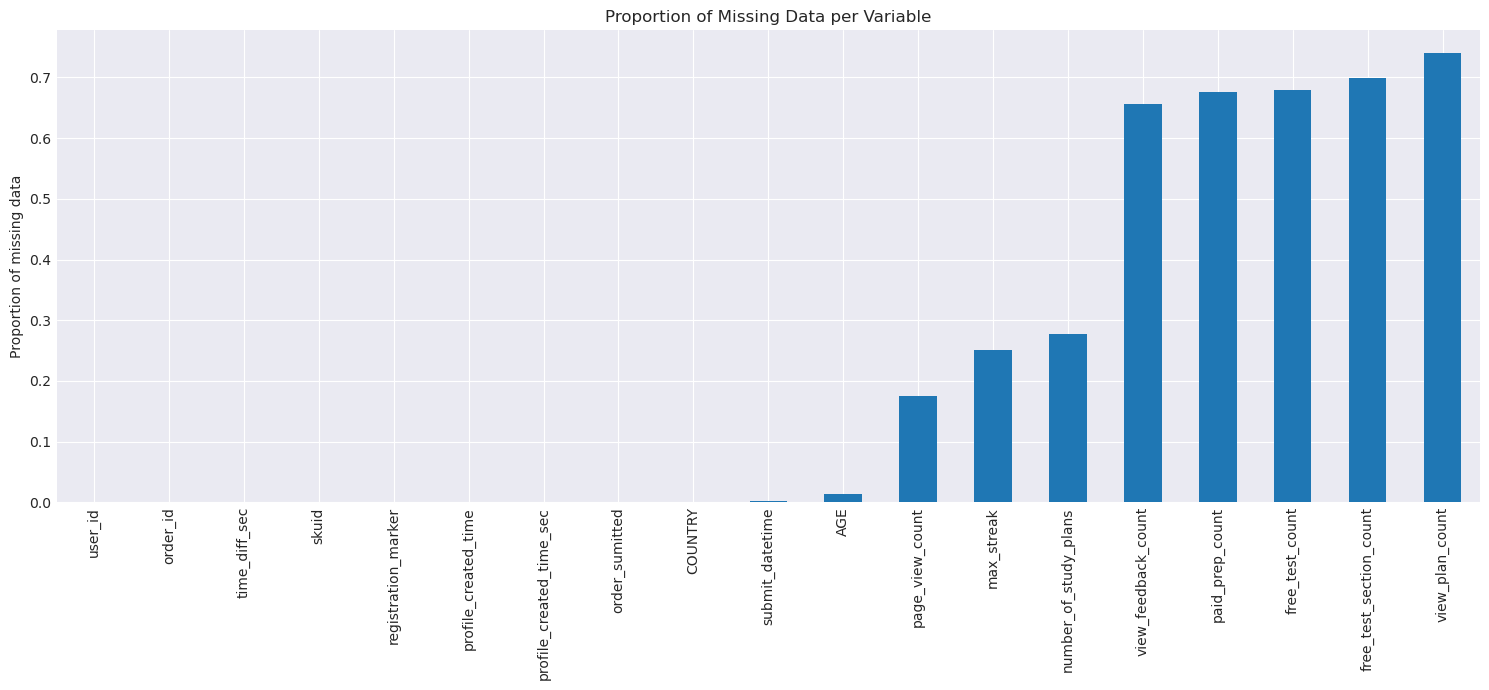

/tmp/ipykernel_6283/1154125814.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['max_streak'].fillna(1, inplace=True)
/tmp/ipykernel_6283/1154125814.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

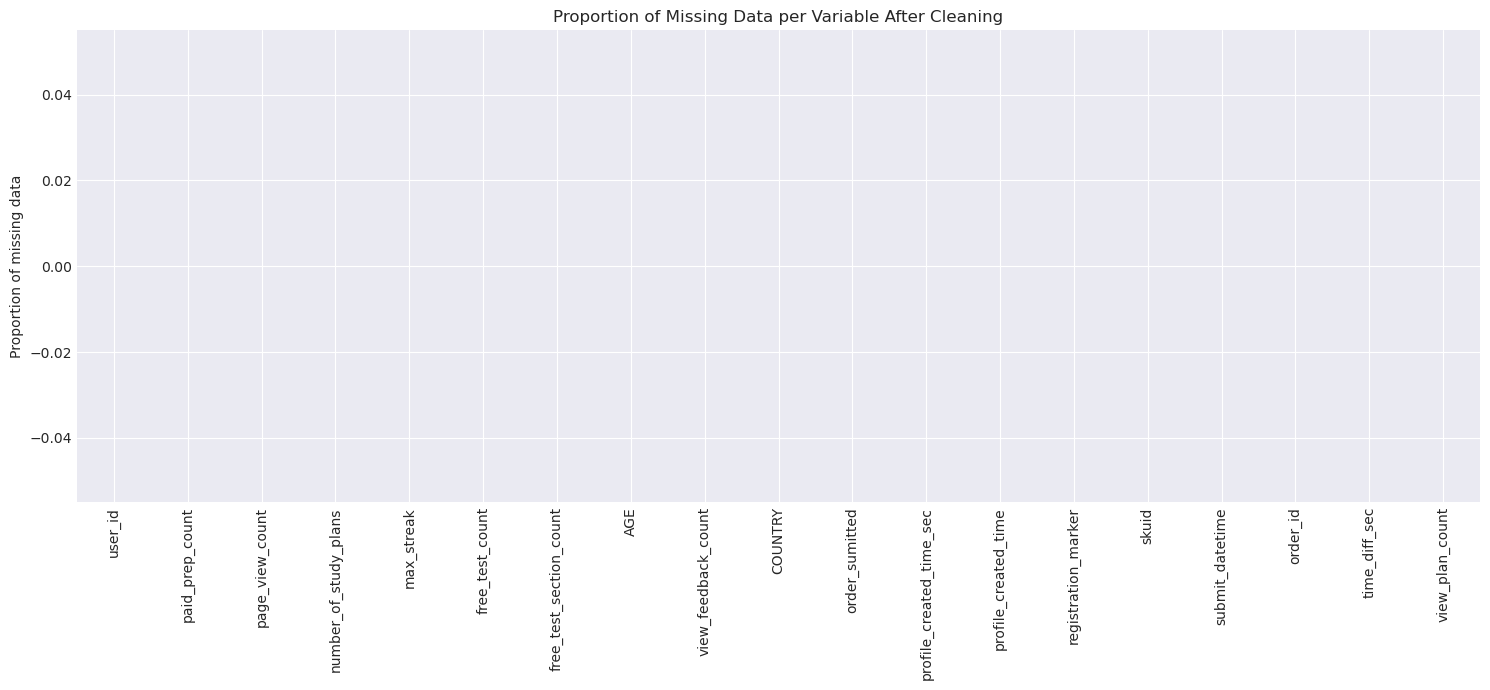

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'merged_dataset_final.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and column names
data_head = data.head()
data_columns = data.columns

# Function to visualize missing data proportion per variable
def visualize_missing_data(df, title="Proportion of Missing Data per Variable"):
    with plt.style.context("seaborn-v0_8-darkgrid"):
        plt.figure(figsize=(15, 7))
        df.isnull().mean().sort_values(ascending=True).plot.bar(rot=45)
        plt.ylabel("Proportion of missing data")
        plt.title(title)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

# Initial visualization of missing data
visualize_missing_data(data)

# Cleaning process

# 1. Remove rows where 'page_view_count' is missing but 'max_streak' is not
inconsistent_rows = data[(data['page_view_count'].isna()) & (data['max_streak'].notna())]
data_cleaned = data.drop(inconsistent_rows.index)

# 2. Fill missing 'max_streak' values with 1 where 'page_view_count' is not missing
data_cleaned['max_streak'].fillna(1, inplace=True)

# 3. Remove rows with inconsistent missing values for key pairs of columns
key_columns_pairs = [
    ('view_plan_count', 'page_view_count'),
    ('number_of_study_plans', 'page_view_count'),
    ('free_test_count', 'page_view_count'),
    ('view_feedback_count', 'page_view_count'),
    ('free_test_section_count', 'page_view_count'),
    ('paid_prep_count', 'page_view_count')
]

for col1, col2 in key_columns_pairs:
    inconsistent_rows = data_cleaned[(data_cleaned[col1].notna()) & (data_cleaned[col2].isna())]
    data_cleaned = data_cleaned.drop(inconsistent_rows.index)

# New steps added here

# Identify rows where view_plan_count is not missing but number_of_study_plans is missing
view_plan_not_missing_study_plan_missing = data[(data['view_plan_count'].notna()) & (data['number_of_study_plans'].isna())]

# Identify rows where view_plan_count is missing but number_of_study_plans is not missing
missing_view_plan_not_study_plan = data[(data['view_plan_count'].isna()) & (data['number_of_study_plans'].notna())]

# Fill missing number_of_study_plans values with 1 where view_plan_count is not missing
data_cleaned['number_of_study_plans'].fillna(1, inplace=True)

# 6. Drop rows where 'AGE' or 'submit_datetime' have missing values
data_cleaned = data_cleaned.dropna(subset=['AGE', 'submit_datetime'])

# 7. Fill remaining missing values with 0
data_cleaned_final = data_cleaned.fillna(0)

# Final visualization of missing data to verify cleaning
visualize_missing_data(data_cleaned_final, title="Proportion of Missing Data per Variable After Cleaning")

# Display the cleaned dataset
data_cleaned_final

# Save the cleaned dataset if needed
data_cleaned_final.to_csv('cleaned_dataset.csv', index=False)

In [2]:
data_cleaned_final

,user_id,order_id,submit_datetime,skuid,registration_marker,profile_created_time,profile_created_time_sec,order_sumitted,time_diff_sec,COUNTRY,AGE,free_test_section_count,free_test_count,max_streak,number_of_study_plans,page_view_count,paid_prep_count,view_feedback_count,view_plan_count
0,13F987F6,137957563,2024-02-18 10:52:30.097000+00:00,6051,0,1706787989822000,1.706788e+09,1.708254e+09,1465560.275,CN,15.0,1.0,1.0,1.0,3.0,133.0,0.0,3.0,0.0
1,13F98A7A,137890605,2024-02-01 18:56:06.108000+00:00,6051,0,1706812320800000,1.706812e+09,1.706814e+09,1445.308,CA,37.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,13F98AHC,137931243,2024-02-11 23:20:58.192000+00:00,6051,0,1706819691211000,1.706820e+09,1.707694e+09,873966.981,US,37.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
3,13F98B34,137891021,2024-02-01 21:47:37.347000+00:00,4053,0,1706822375070000,1.706822e+09,1.706824e+09,1682.277,PT,20.0,0.0,0.0,1.0,1.0,17.0,1.0,1.0,0.0
4,13F98E1G,138070120,2024-03-13 16:43:57.363000+00:00,6042,0,1706868798495000,1.706869e+09,1.710348e+09,3479438.868,DJ,19.0,3.0,4.0,1.0,8.0,280.0,1.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,9PFD1E4D,138169333,2024-04-09 20:54:12.643000+00:00,6051,0,1712322020982000,1.712322e+09,1.712696e+09,374031.661,US,36.0,2.0,1.0,1.0,2.0,94.0,0.0,0.0,3.0
5996,9QFE51C5,138308135,2024-05-21 00:09:25.091000+00:00,4082,0,1716137949988000,1.716138e+09,1.716250e+09,112215.103,NP,26.0,0.0,0.0,1.0,1.0,32.0,2.0,0.0,0.0
5997,9QG43163,138018490,2024-03-02 20:05:28.117000+00:00,4053,0,1706975861796000,1.706976e+09,1.709410e+09,2434066.321,US,41.0,4.0,0.0,3.0,12.0,417.0,2.0,39.0,0.0
5998,9TG483G9,138071901,2024-03-14 04:32:06.628000+00:00,6051,0,1709999807137000,1.710000e+09,1.710391e+09,390919.491,JP,59.0,5.0,1.0,1.0,3.0,241.0,0.0,13.0,0.0
